In [1]:
import os
import requests
from github import Github
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess

pd.set_option('display.max_columns', None)

In [2]:
GITHUB_TOKEN = "git_token"
g = Github(GITHUB_TOKEN)

OUTPUT_FOLDER = "data/java_train/"
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

QUERY = "language:Java stars:>100"
MAX_FILES = 5000

def download_java_files():
    count = 0
    for repo in g.search_repositories(query=QUERY, sort="stars", order="desc"):
        try:
            contents = repo.get_contents("")
            while contents:
                file_content = contents.pop(0)
                if file_content.type == "dir":
                    contents.extend(repo.get_contents(file_content.path))
                elif file_content.name.endswith(".java"):
                    file_data = requests.get(file_content.download_url).text
                    file_path = os.path.join(OUTPUT_FOLDER, file_content.name)
                    with open(file_path, "w", encoding="utf-8") as f:
                        f.write(file_data)
                    print(f"Downloaded: {file_content.name}")
                    count += 1
                    if count >= MAX_FILES:
                        return
        except Exception as e:
            print(f"Error processing repo {repo.full_name}: {e}")

# download_java_files()
# print("Download complete.")

In [3]:
ck_jar_path = 'ck-0.7.1.jar'
java_code_folder = 'data/java_train/'

ck_command = ['java', '-jar', ck_jar_path, java_code_folder, 'false', '0', 'false']
subprocess.run(ck_command, check=True, capture_output=True, text=True)
print(f"CK tool finished")

CK tool finished


In [4]:
input_csv = "class.csv"
df = pd.read_csv(input_csv)

In [5]:
df.describe()

,cbo,cboModified,fanin,fanout,wmc,dit,noc,rfc,lcom,lcom*,tcc,lcc,totalMethodsQty,staticMethodsQty,publicMethodsQty,privateMethodsQty,protectedMethodsQty,defaultMethodsQty,visibleMethodsQty,abstractMethodsQty,finalMethodsQty,synchronizedMethodsQty,totalFieldsQty,staticFieldsQty,publicFieldsQty,privateFieldsQty,protectedFieldsQty,defaultFieldsQty,finalFieldsQty,synchronizedFieldsQty,nosi,loc,returnQty,loopQty,comparisonsQty,tryCatchQty,parenthesizedExpsQty,stringLiteralsQty,numbersQty,assignmentsQty,mathOperationsQty,variablesQty,maxNestedBlocksQty,anonymousClassesQty,innerClassesQty,lambdasQty,uniqueWordsQty,modifiers,logStatementsQty
count,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2140.000000,1612.000000,1612.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.0,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000
mean,3.410508,4.621995,1.211487,3.410508,9.355744,1.227961,0.051647,4.999555,377.416741,0.212972,-0.106079,-0.106079,8.133126,0.202582,6.247551,0.140695,0.432324,1.312556,7.995993,0.029831,0.014693,0.008459,1.685218,0.188335,0.040071,1.442565,0.147818,0.054764,0.402048,0.0,0.606411,58.509795,5.621549,0.235975,0.436776,0.118878,0.059216,10.264025,2.306322,4.156723,0.611754,4.044969,0.467053,0.010686,0.142030,0.177204,27.082369,68.264470,0.285841
std,3.558829,3.817442,1.673925,3.558829,27.619243,0.514937,0.363115,8.803548,4770.984448,0.322928,0.308035,0.308035,26.760633,0.800007,26.365618,0.732187,1.201190,2.741302,26.768903,0.274370,0.215765,0.131531,2.958695,0.603381,0.321739,2.951885,0.591297,0.420130,0.892421,0.0,1.800033,161.859348,26.213636,1.113779,1.387267,0.581550,0.416328,48.387258,6.752093,7.025465,2.344633,6.663548,0.744710,0.145831,0.615933,0.807391,20.956140,252.930089,1.187629
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000
25%,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,1.000000,0.000000
50%,3.000000,4.000000,1.000000,3.000000,3.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.000000,0.000000
75%,4.000000,6.000000,2.000000,4.000000,9.000000,1.000000,0.000000,7.000000,6.000000,0.500000,0.000000,0.000000,6.000000,0.000000,3.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,39.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,6.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,35.000000,1.000000,0.000000
max,44.000000,45.000000,13.000000,44.000000,574.000000,6.000000,6.000000,249.000000,161554.000000,

In [6]:
df.isnull().sum()

file                        0
class                       0
type                        0
cbo                         0
cboModified                 0
fanin                       0
fanout                      0
wmc                         0
dit                         0
noc                         0
rfc                         0
lcom                        0
lcom*                     106
tcc                       634
lcc                       634
totalMethodsQty             0
staticMethodsQty            0
publicMethodsQty            0
privateMethodsQty           0
protectedMethodsQty         0
defaultMethodsQty           0
visibleMethodsQty           0
abstractMethodsQty          0
finalMethodsQty             0
synchronizedMethodsQty      0
totalFieldsQty              0
staticFieldsQty             0
publicFieldsQty             0
privateFieldsQty            0
protectedFieldsQty          0
defaultFieldsQty            0
finalFieldsQty              0
synchronizedFieldsQty       0
nosi      

In [7]:
print(df.columns.to_list())

['file', 'class', 'type', 'cbo', 'cboModified', 'fanin', 'fanout', 'wmc', 'dit', 'noc', 'rfc', 'lcom', 'lcom*', 'tcc', 'lcc', 'totalMethodsQty', 'staticMethodsQty', 'publicMethodsQty', 'privateMethodsQty', 'protectedMethodsQty', 'defaultMethodsQty', 'visibleMethodsQty', 'abstractMethodsQty', 'finalMethodsQty', 'synchronizedMethodsQty', 'totalFieldsQty', 'staticFieldsQty', 'publicFieldsQty', 'privateFieldsQty', 'protectedFieldsQty', 'defaultFieldsQty', 'finalFieldsQty', 'synchronizedFieldsQty', 'nosi', 'loc', 'returnQty', 'loopQty', 'comparisonsQty', 'tryCatchQty', 'parenthesizedExpsQty', 'stringLiteralsQty', 'numbersQty', 'assignmentsQty', 'mathOperationsQty', 'variablesQty', 'maxNestedBlocksQty', 'anonymousClassesQty', 'innerClassesQty', 'lambdasQty', 'uniqueWordsQty', 'modifiers', 'logStatementsQty']


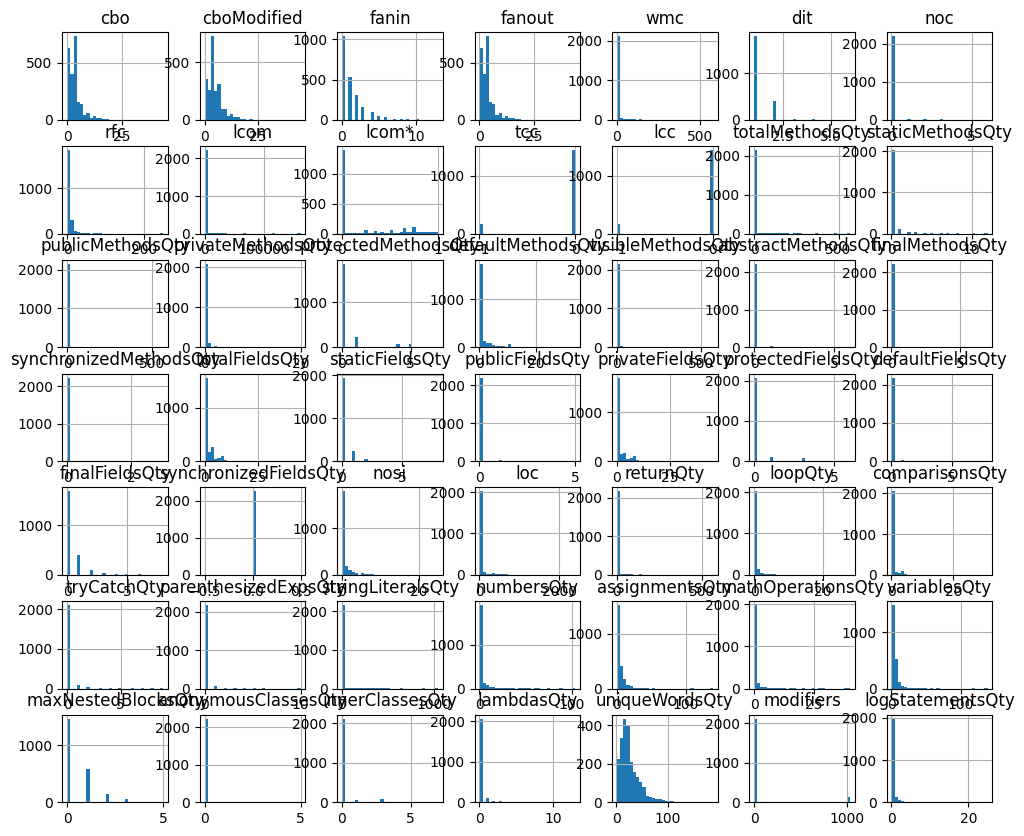

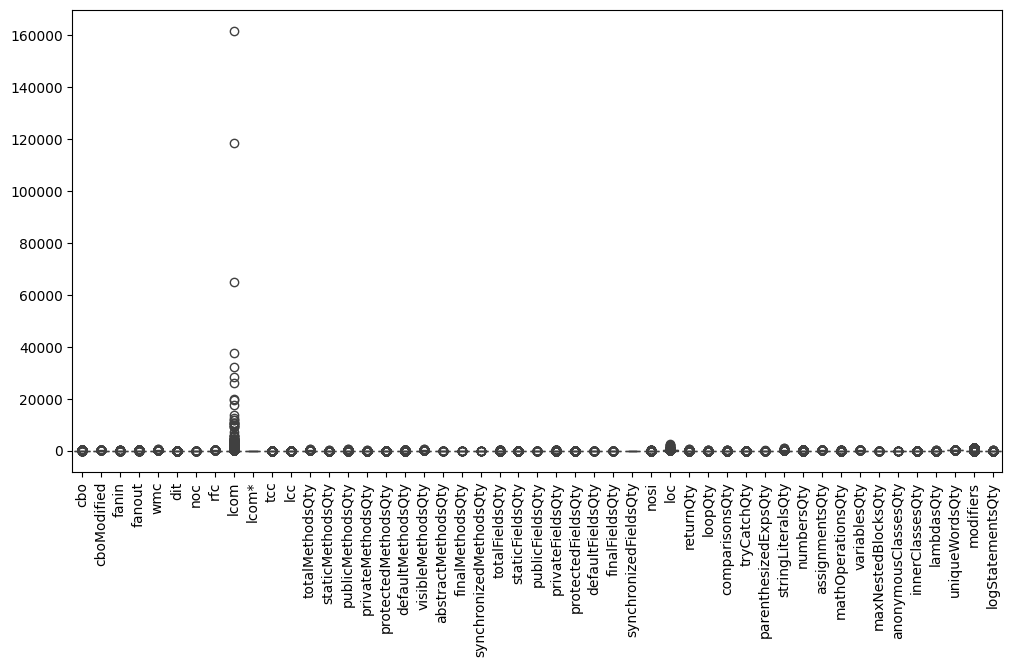

In [8]:
df.hist(figsize=(12, 10), bins=30)
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [9]:
def find_outliers(df, column_list, quantile_value=0.90):
    return df[column_list].quantile(quantile_value)

featureenvy_features = ['cbo', 'fanout', 'tcc', 'lcc', 'variablesQty', 'assignmentsQty']
god_class_features = ['loc', 'wmc', 'rfc', 'cbo', 'lcom', 'lcom*', 'totalMethodsQty', 'totalFieldsQty', 'tcc', 'lcc']
longmethod_features = ['loc', 'loopQty', 'maxNestedBlocksQty', 'comparisonsQty', 'mathOperationsQty', 'variablesQty', 'assignmentsQty', 'returnQty', 'logStatementsQty']
longparameter_features = ['variablesQty', 'assignmentsQty']
refusedbequest_features = ['dit', 'lcom', 'lcom*', 'tcc', 'lcc', 'totalMethodsQty']
shotgunsurgery_features = ['cbo', 'cboModified', 'fanout', 'rfc']

In [10]:
find_outliers(df, featureenvy_features, quantile_value=0.75)

cbo               4.0
fanout            4.0
tcc               0.0
lcc               0.0
variablesQty      6.0
assignmentsQty    6.0
Name: 0.75, dtype: float64

In [11]:
find_outliers(df, god_class_features, quantile_value=0.75)

loc                39.0
wmc                 9.0
rfc                 7.0
cbo                 4.0
lcom                6.0
lcom*               0.5
totalMethodsQty     6.0
totalFieldsQty      2.0
tcc                 0.0
lcc                 0.0
Name: 0.75, dtype: float64

In [12]:
find_outliers(df, longmethod_features, quantile_value=0.75)

loc                   39.0
loopQty                0.0
maxNestedBlocksQty     1.0
comparisonsQty         0.0
mathOperationsQty      0.0
variablesQty           6.0
assignmentsQty         6.0
returnQty              3.0
logStatementsQty       0.0
Name: 0.75, dtype: float64

In [13]:
find_outliers(df, longparameter_features, quantile_value=0.60)

variablesQty      3.0
assignmentsQty    3.0
Name: 0.6, dtype: float64

In [14]:
find_outliers(df, refusedbequest_features, quantile_value=0.75)

dit                1.0
lcom               6.0
lcom*              0.5
tcc                0.0
lcc                0.0
totalMethodsQty    6.0
Name: 0.75, dtype: float64

In [15]:
find_outliers(df, shotgunsurgery_features, quantile_value=0.75)

cbo            4.0
cboModified    6.0
fanout         4.0
rfc            7.0
Name: 0.75, dtype: float64

In [16]:
def featureenvy_label(row):
    if (row['cbo']>4) or (row['fanout']>4) or (row['tcc']>0) or (row['lcc']>0) or (row['assignmentsQty']>4) or (row['variablesQty']>5):
        return 1
    return 0

def godclass_label(row):
    if (row['loc']>39) or (row['wmc']>9) or (row['rfc']>7) or (row['cbo']>4) or (row['lcom']>6) or (row['lcom*']>0.5) or (row['totalMethodsQty']>6) or (row['totalFieldsQty']>2) or (row['tcc']>0) or (row['lcc']>0):
        return 1
    return 0

def longmethod_label(row):
    if (row['loc']>39) or (row['loopQty']>0) or (row['maxNestedBlocksQty']>1) or (row['comparisonsQty']>0) or (row['mathOperationsQty']>0) or (row['variablesQty']>6) or (row['assignmentsQty']>6) or (row['returnQty']>3) or (row['logStatementsQty']>0):
        return 1
    return 0

def longparameter_label(row):
    if (row['variablesQty']>3) or (row['assignmentsQty']>3):
        return 1
    return 0

def refusedbequest_label(row):
    if (row['dit']>1) or (row['lcom']>6) or (row['lcom*']>0.5) or (row['tcc']>0) or (row['lcc']>0) or (row['totalMethodsQty']>6):
        return 1
    return 0

def shotgunsurgery_label(row):
    if (row['cbo']>4) or (row['cboModified']>6) or (row['fanout']>4) or (row['rfc']>7):
        return 1
    return 0

In [17]:
def save_dataset(df, codesmell):
    codesmell_path = f"data/dataset/{codesmell}/"
    os.makedirs(codesmell_path, exist_ok=True)
    
    metrics_df = df.drop(columns=['file', 'class', 'type'])
    metrics_df.to_csv(os.path.join(codesmell_path, f"{codesmell}_metrics.csv"), index=False)
    print(f"{codesmell} Metrics saved")
    
    labels_df = df[['file', 'class', 'label']]
    labels_df.to_csv(os.path.join(codesmell_path, f"{codesmell}_labels.csv"), index=False)
    print(f"{codesmell} Labels saved")

In [18]:
df_featureenvy = df.copy()
df_godclass = df.copy()
df_longmethod = df.copy()
df_longparameter = df.copy()
df_refusedbequest = df.copy()
df_shotgunsurgery = df.copy()

df_featureenvy['label'] = df_featureenvy.apply(featureenvy_label, axis=1)
df_godclass['label'] = df_godclass.apply(godclass_label, axis=1)
df_longmethod['label'] = df_longmethod.apply(longmethod_label, axis=1)
df_longparameter['label'] = df_longparameter.apply(longparameter_label, axis=1)
df_refusedbequest['label'] = df_refusedbequest.apply(refusedbequest_label, axis=1)
df_shotgunsurgery['label'] = df_shotgunsurgery.apply(shotgunsurgery_label, axis=1)

save_dataset(df_featureenvy, "featureenvy")
save_dataset(df_godclass, "godclass")
save_dataset(df_longmethod, "longmethod")
save_dataset(df_longparameter, "longparameter")
save_dataset(df_refusedbequest, "refusedbequest")
save_dataset(df_shotgunsurgery, "shotgunsurgery")

featureenvy Metrics saved
featureenvy Labels saved
godclass Metrics saved
godclass Labels saved
longmethod Metrics saved
longmethod Labels saved
longparameter Metrics saved
longparameter Labels saved
refusedbequest Metrics saved
refusedbequest Labels saved
shotgunsurgery Metrics saved
shotgunsurgery Labels saved


In [19]:
def check_balance(df):
    print(df['label'].value_counts(normalize=True))

check_balance(df_featureenvy)
check_balance(df_godclass)
check_balance(df_longmethod)
check_balance(df_longparameter)
check_balance(df_refusedbequest)
check_balance(df_shotgunsurgery)

label
0    0.56545
1    0.43455
Name: proportion, dtype: float64
label
1    0.571683
0    0.428317
Name: proportion, dtype: float64
label
1    0.517364
0    0.482636
Name: proportion, dtype: float64
label
0    0.60374
1    0.39626
Name: proportion, dtype: float64
label
0    0.536064
1    0.463936
Name: proportion, dtype: float64
label
0    0.617542
1    0.382458
Name: proportion, dtype: float64


In [20]:
def delete_file_if_exists(filepath):
    os.path.exists(filepath) and os.remove(filepath)

delete_file_if_exists('class.csv')
delete_file_if_exists('method.csv')

print("Deleted ck_output files")

Deleted ck_output files
